<a href="https://colab.research.google.com/github/nihalhabeeb/hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

Exploratory data analysis (EDA) is a very critical aspect of data science, which refers to techniques and methods to analyse datasets and understand their characteristics. It helps us understand the data, discover interesting patterns, measure the relationship between variables and detect errors. It is a prerequisite for selecting features and deciding ML models. Sometimes, it is even sufficient for making decisions.

Data scientists spent a good amount of time on exploratory analysis.

The analysis of this hotel booking dataset can provide useful information to help the hotels to make appropriate changes to improve their services and thus better the business. We could potentially discover interesting trends that can help a customer in choosing good deals while booking.

### **Dataset Information:**


**hotel:** city hotel or resort hotel

**is_canceled:** whether the booking was cancelled or not

**lead_time:** number of days between entering booking info and arrival of guest

**arrival_date_year:** year of arrival

**arrival_date_month:** month of arrival

**arrival_date_week_number:** week number of arrival date

**arrival_date_day_of_month:** day of arrival

**stays_in_weekend_nights:** number of weekend nights stayed

**stays_in_week_nights:** number of week nights stayed

**adults:** number of adult guests

**children:** number of children

**babies:** number of babies

**meal:** type of meal booked:-  Undefined/SC; BB – Bed & Breakfast; HB – Half board; FB – Full board (breakfast, lunch and dinner)

**country:** Country of origin of guests

**market_segment:** Online TA; Offline TA/TO; Direct; Groups; Corporate; Complementary; Aviation

**distribution_channel:** TA/TO; Direct; Corporate; GDS; Undefined

**is_repeated_guest:** if the guest has booked earlier

**previous_cancellations:** number of bookings guests have cancelled before

**previous_bookings_not_canceled:** number of bookings guests have not cancelled before

**reserved_room_type:** code of reserved room type (actual type anonymous)

**assigned_room_type:** code of room type assigned

**booking_changes:** number of changes made in the booking


**deposit_type:** No Deposit; Non Refund - deposit of total stay cost made; Refundable – a deposit was made with a value under the total cost of stay.

**agent:** ID of agency that made the booking

**company:** ID of company responsible for the booking

**day_in_waiting_list:** Number of days the booking took before confirmation.

**customer_type:** Contract - when the booking some type of contract associated to it; Group – booking is associated to a group; Transient – booking is not part of a group or contract, and not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

**adr:** average daily rate

**required_car_parking_spaces:** number of car parking spaces required by the customer

**total_of_special_requests:** number of special requests made

**reservation_status:** Canceled; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason

**reservation_status_date:** date at which last status was set


The first step is to set up the notebook. We can begin by mounting google drive and importing necessary libraries.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Then the dataset can be loaded as a pandas dataframe 

In [ ]:
file_path = '/content/drive/MyDrive/AlmaBetter/Capstone Projects/EDA/Hotel Bookings.csv'
hotel_df = pd.read_csv(file_path)  

In [ ]:
# shape of the dataset
hotel_df.shape

(119390, 32)

Great..! We know that our dataset has 119390 rows and 32 columns. Let us get some information on the data types and null values in each column.

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

describe() method can be used to get statistical information about the dataset. We were able to make some very important findings using this information (which comes later in the notebook).

In [ ]:
hotel_df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


## Preparing and cleaning the dataset

### Handing Null Values

Now lets find out how many missing values are there in our data set

In [ ]:
hotel_df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

The percentage of null values in each columns give a better picture and will help us to decide if any columns have to be removed.

In [ ]:
hotel_df.isnull().sum().sort_values(ascending = False)/len(hotel_df.index)*100

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
is_canceled                        0.000000
market_segment                     0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
babies                             0.000000
meal                               0.000000
reservation_status_date            0.000000
distribution_channel               0.000000
reservation_status                 0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type              

The 'company' column has around 94% null values! The 'agent' column has much less but still non-negligible amount (around 14%) of null values. The 'country' and 'children' have negligible amount of null values.

In [ ]:
# looking at an element in the agent column
hotel_df['agent'][10]

240.0

The 'agent' column consists of float values. A little research about the dataset on the internet revealed that this column refers to the agent's ID. So, the null values cannot be replaced by a value imputed from the rest of the values to make any sense. Since, they are just IDs it is better to remove the column entirely as they won't be necessary in any analysis considering the fact that a good amount of null values are present.

The 'company' column can be removed easily as most of the values are null. Those values also refer to the company ID and removing them is not an issue anyway.

In [ ]:
hotel_df = hotel_df.drop(columns=['company','agent'],axis=1)

The 'children' and 'country' columns have some null values. Those rows which contain the null values can be removed from the analysis.

In [ ]:
# dropping the rows with null values completely
hotel_df = hotel_df.dropna(axis=0)

Now we can see that there are no null values in the data set

In [ ]:
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Handling Some Data That Don't Make Any Sense!

From the describe() method used earlier we noticed something. The minimum value of adults column is zero. While it is possible that there are bookings done by children only without any adult present it is better to check those data carefully.

In [ ]:
# getting the data with adults column having zero value
hotel_df[hotel_df.adults == 0].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,122,Transient-Party,0.0,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,122,Transient-Party,0.0,0,0,Check-Out,2016-01-05


There are bookings where the number of adults, children and babies are zero! That would imply there are zero guests in the booking which does not make any sense. We decided to consider such data as incorrect and exclude them from the analysis.

A new column 'Total Guests' is created.

In [ ]:
hotel_df['total_guests'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']

We select only those data where all the three columns (adults, babies and children) are zero i.e the total guests are zero.

In [ ]:
# dropping those rows which have zero total guests
hotel_df.drop(hotel_df[hotel_df['total_guests']==0].index, inplace = True)

In [ ]:
# checking if there are any rows with zero total guests
hotel_df[hotel_df.total_guests == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests


# Exploratory Data Analysis

Now that the cleaning of data is done. we can get into analysis.

## Which hotel has the most bookings?

Lets start by looking at the number of bookings in each hotel.

In [ ]:
hotel_df['hotel'].value_counts()

City Hotel      79143
Resort Hotel    39585
Name: hotel, dtype: int64

Text(0, 0.5, 'number of bookings')

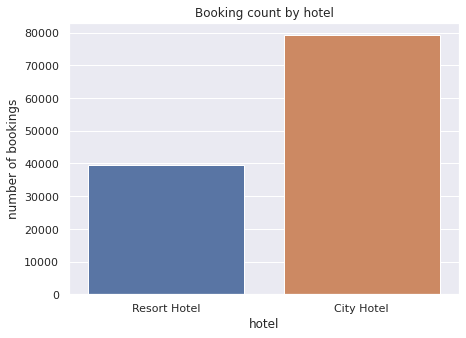

In [ ]:
sns.set(rc = {'figure.figsize':(7,5)})
sns.countplot(hotel_df.hotel)
plt.title("Booking count by hotel")
plt.ylabel("number of bookings")

We see that the city hotel has many more number of bookings compared to the resort hotel. Around 67 % of the bookings are for city hotel (as seen below).

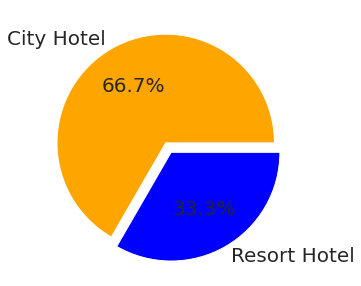

In [ ]:
# plotting pie chart of percentage of bookings by hotel type
labels = hotel_df['hotel'].value_counts().index.tolist()
sizes = hotel_df['hotel'].value_counts().tolist()
explode = (0, 0.10)
colors = ['orange', 'blue']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =0, textprops={'fontsize': 20},radius=1)
plt.show()

## How many bookings were cancelled?

In the dataset, we see a lot of cancelled bookings. The 'is_canceled' column contains this information with '0' referring to bookings that were not cancelled and '1' referring to cancelled bookings.

In [ ]:
 hotel_df['is_canceled'].value_counts()

0    74590
1    44138
Name: is_canceled, dtype: int64

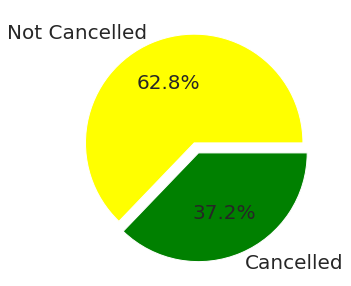

In [ ]:
# plotting pie chart of percentage of bookings cancelled
labels = hotel_df['is_canceled'].value_counts().index.tolist()
sizes = hotel_df['is_canceled'].value_counts().tolist()
explode = (0, 0.10)
colors = ['yellow', 'green']

plt.pie(sizes, explode=explode, labels=['Not Cancelled', 'Cancelled'], colors=colors, autopct='%1.1f%%',startangle =0, textprops={'fontsize': 20},radius=1)
plt.show()

Around 37 % of the total bookings were cancelled. We can gain more information about cancellations by hotel type.

In [ ]:
# cross table to compare the booking cancellation across the two hotels
cancel_by_hotel_type = pd.crosstab(hotel_df['hotel'],hotel_df['is_canceled'], rownames=['Hotel'], colnames=['Cancellation'])
cancel_by_hotel_type

Cancellation,0,1
Hotel,,
City Hotel,46082,33061
Resort Hotel,28508,11077


Text(0, 0.5, 'Number of bookings')

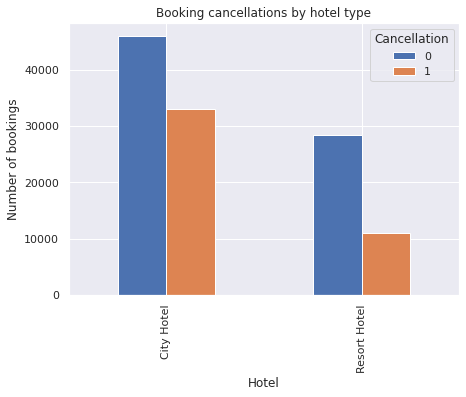

In [ ]:
# plotting the crosstable
cancel_by_hotel_type.plot(kind='bar')
plt.title("Booking cancellations by hotel type")
plt.ylabel("Number of bookings")

We already knew that the overall number of bookings are higher for city hotel and this can be seen in the above plot too. But from the plot we can also understand that the city hotel has a higher percentage of cancellations (i.e the number of cancellations with respect to the total bookings for city hotel is higher in comparison to that of resort hotel). This can be numerically confirmed by using the data from the crosstable 'cancel_by_hotel_type'.

In [ ]:
# the percentage of cancelled bookings for city hotel (cancelled city hotel bookings/total city hotel bookings*100)
print('Percentage of cancellation for City Hotel ',(cancel_by_hotel_type[1][0]/(cancel_by_hotel_type[0][0] + cancel_by_hotel_type[1][0]))*100)
# the percentage of cancelled bookings for resort hotel (cancelled resort hotel bookings/total resort hotel bookings*100)
print('Percentage of cancellation for Resort Hotel ',(cancel_by_hotel_type[1][1]/(cancel_by_hotel_type[0][1] + cancel_by_hotel_type[1][1]))*100)

Percentage of cancellation for City Hotel  41.773751310918215
Percentage of cancellation for Resort Hotel  27.982821775925228


Let us explore some potential reasons for high cancellation rate.

### Deposit Type

Lets make a comparison of number of bookings by deposit type.

Text(0.5, 0, 'deposit types')

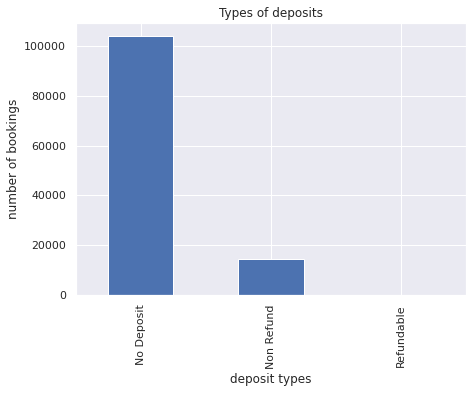

In [ ]:
# plotting booking count by deposit type
hotel_df['deposit_type'].value_counts().plot(kind='bar')
plt.title("Types of deposits")
plt.ylabel("number of bookings")
plt.xlabel("deposit types")

This reveals that most bookings had no deposit made while booking. This makes it inexpensive for a customer to cancel a booking. It could be one of the contributing factors to the high cancellation percentage.

### Days in waiting list

Lets look at the days in waiting lists for cancelled and not cancelled bookings.

In [ ]:
# average days in waiting list
hotel_df.groupby(['is_canceled'])['days_in_waiting_list'].mean()

is_canceled
0    1.596648
1    3.571027
Name: days_in_waiting_list, dtype: float64

In [ ]:
# maximum days in waiting list
hotel_df.groupby(['is_canceled'])['days_in_waiting_list'].max()

is_canceled
0    379
1    391
Name: days_in_waiting_list, dtype: int64

The average days in waiting list was higher for the cancelled bookings. While it is not necessary that a customer will cancel a booking because it took many days to confirm, it certainly is a potential motivation to do so.

### Lead time

Lead time refers to the number of days between the day of booking and arrival date of the guest.

In [ ]:
# average lead time for cancelled and not cancelled bookings
hotel_df.groupby(['is_canceled'])['lead_time'].mean()

is_canceled
0     80.418796
1    144.930015
Name: lead_time, dtype: float64

The cancelled bookings having a higher average lead time is understandable. Because the higher the time between booking and checking in, more the time for making the decision to cancel.

### Checked in bookings

We decided to exclude the cancelled bookings from the rest of the analysis and only consider those where the guests checked in. As they haven't stayed at the hotels there is no reason to include the cancelled bookings in most of the analysis (for instance, the analysis of the busiest months, where the cancelled bookings are not contributing).

In [ ]:
# taking those data where 'is_canceled' is zero i.e the bookings where guests checked-in to a new dataframe
hotel_checked_in_df = hotel_df[hotel_df['is_canceled'] == 0]

In [ ]:
# confirm if the number of rows is same as that of the 'not cancelled'
hotel_checked_in_df.shape

(74590, 31)

Let us take a look at the distribution of bookings by hotel once again now that the cancelled bookings are ignored.

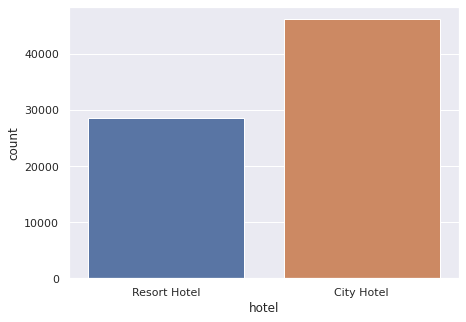

In [ ]:
# booking count by hotel type
sns.countplot(data = hotel_checked_in_df, x='hotel')

## Which is the busiest month across the year (2016)?

### Month-wise comparison across the years

Month-wise comparison across the year was not the first comparison that we did. But this revealed some information which affected the year-wise and month-wise analysis that we did earlier and the conclusions we made from them. So we modified those analysis and pushed them down in the notebook.

Text(0.5, 1.0, 'Month-wise comparison across three years')

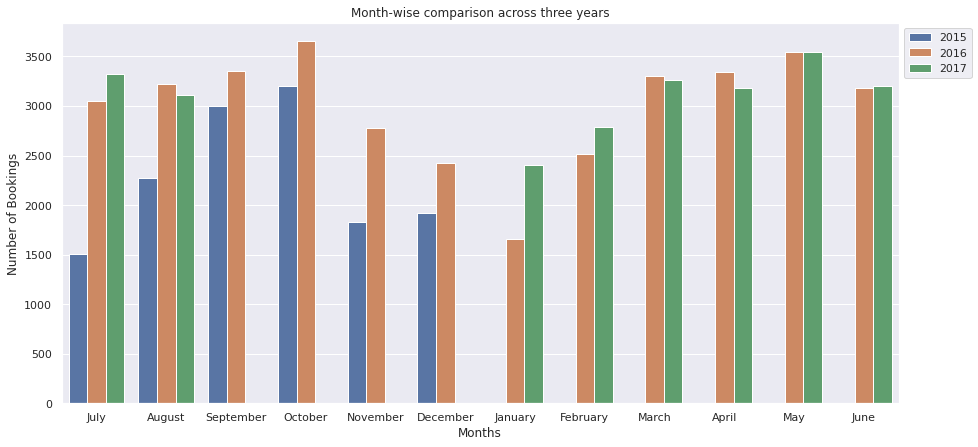

In [ ]:
sns.set(rc = {'figure.figsize':(15,7)})
# booking count each month by arrival year
sns.countplot(data = hotel_checked_in_df, x='arrival_date_month', hue = 'arrival_date_year')
plt.legend(bbox_to_anchor=(1.0, 1))
plt.xlabel('Months')
plt.ylabel('Number of Bookings')
plt.title('Month-wise comparison across three years')

It is interesting to see that in certain years, there are zero bookings in some months! 2017 saw zero bookings in both hotels from September to December while 2015 has zero bookings from January to June. 2016, the middle year, has bookings in all months.

At first it seemed like an unexplainable observation, but the reason was simple. This dataset has booking information from July 2015 to August 2017 only!

**This means that many of the conclusions we made using arrival year and arrival month information was wrong**.

The arrival year data cannot be used to find the busiest year as this dataset doesn't contain complete information of 2015 and 2017. But we still look at the distribution of the available data across the years later in the notebook.

Similarly, month information cannot help us find the busiest month across the three years as we do not have complete booking information of all the months. We can only look at the month-wise distribution of the available data. But we can find the busiest month in the year 2016.

### Number of bookings across the months

We will look at the month-wise distribution of **available data**.

In [ ]:
hotel_checked_in_df['arrival_date_month'].value_counts()

August       8604
July         7880
May          7091
October      6854
March        6566
April        6528
June         6384
September    6360
February     5304
November     4611
December     4347
January      4061
Name: arrival_date_month, dtype: int64

We can display the booking count in the order of months. This can be done by reindexing the pandas series.

In [ ]:
# list for new index in the order of months
new_index = ['January','February','March','April','May','June','July','August','September','October','November','December']

# the series will be rearranged according to the new index
month_count = hotel_checked_in_df['arrival_date_month'].value_counts().reindex(new_index)
month_count

January      4061
February     5304
March        6566
April        6528
May          7091
June         6384
July         7880
August       8604
September    6360
October      6854
November     4611
December     4347
Name: arrival_date_month, dtype: int64

A bar graph of the booking count across the months can be plotted.

Text(0.5, 1.0, 'Plot 1: Number of Bookings Across Months')

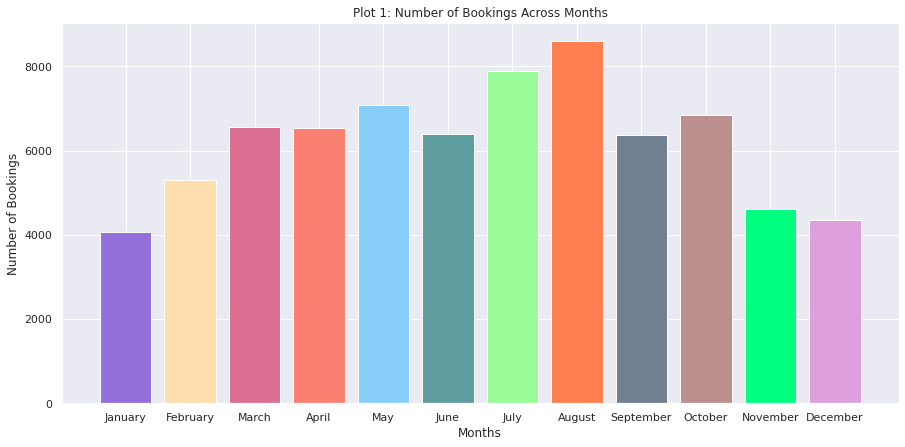

In [ ]:
# setting x and y values
x_values = month_count.index
# y_values = total number of bookings each month
y_values = month_count

# plotting number of bookings vs months
plt.figure(figsize=(15,7))
plt.bar(x_values,y_values, color = ['mediumpurple','navajowhite','palevioletred','salmon','lightskyblue','cadetblue','palegreen','coral','slategray','rosybrown','springgreen','plum'])
plt.xlabel('Months')
plt.ylabel('Number of Bookings')
plt.title('Plot 1: Number of Bookings Across Months')

We cannot make a safe conclusion about the busiest month from this (Plot 1) simply because the booking data of January to June of 2015 and September to December of 2017 are not present. This distribution is incorrect. But we can look at 2016 alone.

### Month-wise distribution across 2016

We can construct a similar bar plot for 2016.

In [ ]:
# new data frame only containing data of 2016
hotel_2016_df = hotel_checked_in_df[hotel_checked_in_df['arrival_date_year'] == 2016]

In [ ]:
# month-wise booking count for 2016
# reindexed to month order
month_count_2016 = hotel_2016_df['arrival_date_month'].value_counts().reindex(new_index)
month_count_2016

January      1658
February     2516
March        3307
April        3343
May          3548
June         3183
July         3052
August       3222
September    3358
October      3657
November     2780
December     2427
Name: arrival_date_month, dtype: int64

Text(0.5, 1.0, 'Plot 2: Number of Bookings Across Months of 2016')

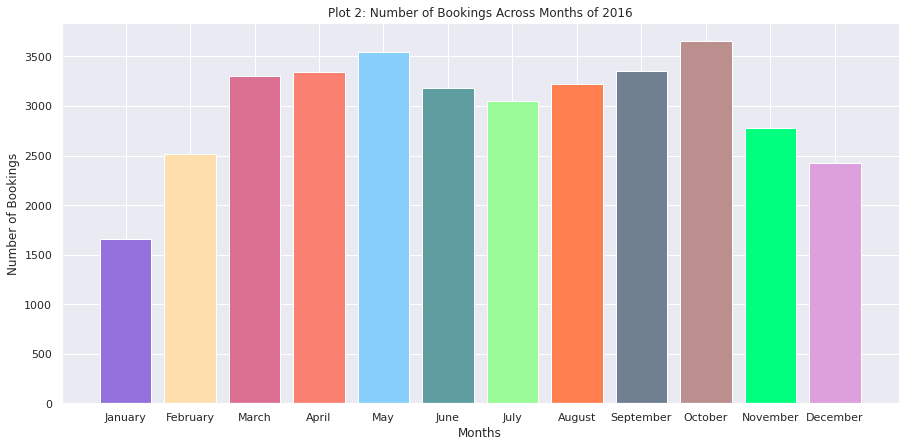

In [ ]:
# setting x and y values
x_values = month_count_2016.index
# y_values = total number of bookings each month
y_values = month_count_2016

# plotting number of bookings vs months
plt.figure(figsize=(15,7))
plt.bar(x_values,y_values, color = ['mediumpurple','navajowhite','palevioletred','salmon','lightskyblue','cadetblue','palegreen','coral','slategray','rosybrown','springgreen','plum'])
plt.xlabel('Months')
plt.ylabel('Number of Bookings')
plt.title('Plot 2: Number of Bookings Across Months of 2016')

The distribution of data across months is very different in the plot 2 compared to the plot 1. The number of bookings across months seem much more consistent. The booking count for beginning and end of the year with respect to the rest is comparitively higher. Note that we do not have data of beginning and end of the year for 2015 and 2017 respectively and this could be the reason why their count was very less in plot 1.

In plot 1, July and August had higher count than the rest but in plot 2 they don't stand out. In fact, October followed by May has the highest booking count in this plot (which is of 2016 alone). July and August had data from all the three years (in case of plot 1). That is why they had a much higher count in the first plot.

This is the distribution of 2016 alone and there is no necessity that other years follow similar trends. But comparing plot 1 to this plot allows us to see the errors made in the former due to the incomplete data.

## Year-wise distribution of the available booking data

In [ ]:
hotel_checked_in_df['arrival_date_year'].value_counts()

2016    36051
2017    24814
2015    13725
Name: arrival_date_year, dtype: int64

We can plot a pie chart and see the percentage of booking in each year. But as mentioned earlier this only gives the distribution of the **available data** across the three years. We do not actually get the percentage due to incomplete information.

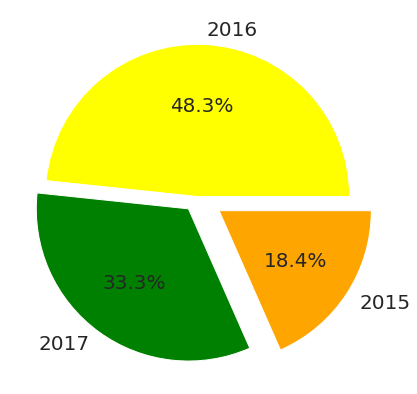

In [ ]:
# list of labels
labels = hotel_checked_in_df['arrival_date_year'].value_counts().index.tolist()
# values
sizes = hotel_checked_in_df['arrival_date_year'].value_counts().tolist()
# measure of how much the slice stands out
explode = (0, 0.1, 0.17)
colors = ['yellow', 'green', 'orange']
# pie chart of percentage of booking data across three years
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =0, textprops={'fontsize': 20},radius=1)
plt.show()

From the chart we concluded that 2016 was the busiest year out of the three without realising that data was missing. But since we do not have complete data of 2015 and 2017, 2016 will automatically have a higher booking count and so **we cannot conclude that 2016 is the busiest year**.

## Which is the most sought after room type?

The room types have been coded with alphabets from A-L for anonymity. Let us have a look at the reserved room types to understand the distribution across the categories.

### Reserved room type

In [ ]:
hotel_checked_in_df['reserved_room_type'].value_counts()

A    51906
D    13051
E     4578
F     2007
G     1318
B      748
C      622
H      356
L        4
Name: reserved_room_type, dtype: int64

Text(0.5, 1.0, 'Number of bookings by reserved room type')

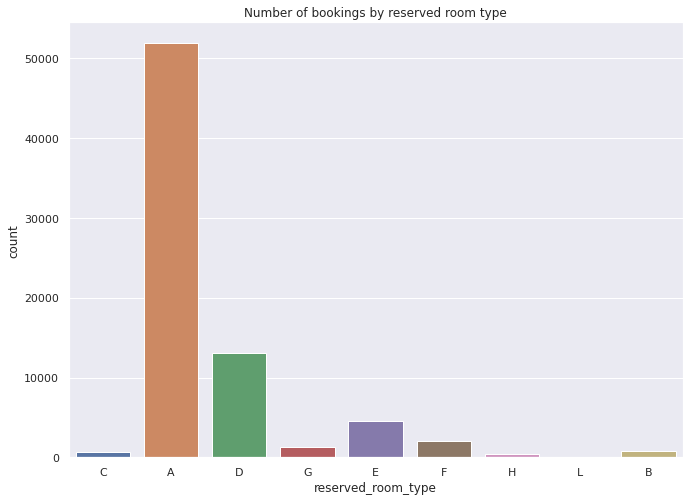

In [ ]:
sns.set(rc = {'figure.figsize':(11,8)})
# number of bookings by reserved room type
sns.countplot(data = hotel_checked_in_df, x='reserved_room_type')
plt.title('Number of bookings by reserved room type')

Room type A was reserved the most by a large margin while type L was reserved the least (I and K not reserved at all). Now lets look at the distribution of assigned room types.

### Assigned room type

In [ ]:
hotel_checked_in_df['assigned_room_type'].value_counts()

A    40930
D    18796
E     5774
F     2806
C     1905
G     1755
B     1643
H      457
I      348
K      176
Name: assigned_room_type, dtype: int64

Text(0.5, 1.0, 'Number of bookings by assigned room type')

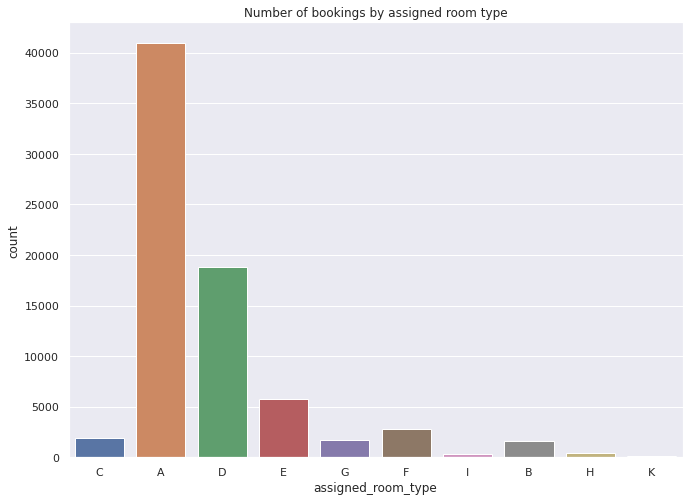

In [ ]:
sns.set(rc = {'figure.figsize':(11,8)})
# number of bookings by assigned room type
sns.countplot(data = hotel_checked_in_df, x='assigned_room_type')
plt.title('Number of bookings by assigned room type')

Eventhough type A is assigned the most, we can notice some differences in the number of assigned rooms of each types compared to the reserved room types. This implies that some guests who reserved a particular room type did not get the same room type assigned. A comparison can be made graphically to see the difference. Note: certain room types are completely missing in both columns.

In [ ]:
room_type_index = ['A','B','C','D','E','F','G','H','I','K','L']
# reindexing to make the order same for both the series
assigned_room_count = hotel_checked_in_df['assigned_room_type'].value_counts().reindex(room_type_index)
reserved_room_count = hotel_checked_in_df['reserved_room_type'].value_counts().reindex(room_type_index)
print(reserved_room_count, '\n')
print(assigned_room_count)

A    51906.0
B      748.0
C      622.0
D    13051.0
E     4578.0
F     2007.0
G     1318.0
H      356.0
I        NaN
K        NaN
L        4.0
Name: reserved_room_type, dtype: float64 

A    40930.0
B     1643.0
C     1905.0
D    18796.0
E     5774.0
F     2806.0
G     1755.0
H      457.0
I      348.0
K      176.0
L        NaN
Name: assigned_room_type, dtype: float64


Assigned room type column has L type missing i.e there are no bookings where this type was assigned. The reserved room type column has I and K missing which implies that no guests reserved those types however some guests were assigned those room types. So we can replace the missing values with zero.

In [ ]:
# replacing missing values with 0
assigned_room_count.fillna(0, inplace = True)
reserved_room_count.fillna(0, inplace = True)

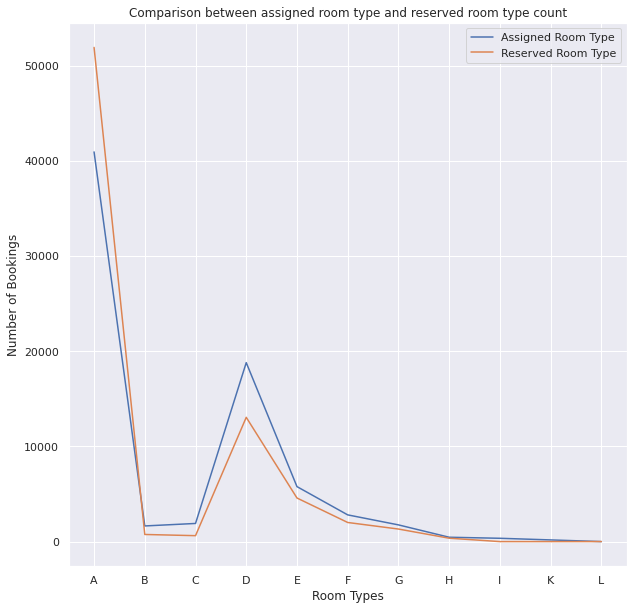

In [ ]:
plt.figure(figsize=(10,10))
# lineplot of assigned room type
plt.plot(assigned_room_count, label = 'Assigned Room Type')
# lineplot of reserved room type
plt.plot(reserved_room_count, label = 'Reserved Room Type')
plt.title('Comparison between assigned room type and reserved room type count')
plt.xlabel('Room Types')
plt.ylabel('Number of Bookings')
plt.legend()
plt.show()

For every type except A, the number of assigned rooms is more than the number of reserved rooms (its true for I and K also, and the reverse is true for L but the number is negligible in comparison to others) i.e those types have been assigned to many people who did not reserve those types while many people who reserved room A did not get them. Its possible to conclude that A is the most sought after room type and the demand for it is not met (by a large margin).

## From which countries do most guests arrive?

We can look at the country column to get an idea of the most common countries where guests come from.

In [ ]:
# total number of bookings from each country.
country = hotel_checked_in_df['country'].value_counts()
country

PRT    20977
GBR     9668
FRA     8468
ESP     6383
DEU     6067
       ...  
FRO        1
AIA        1
ATF        1
BWA        1
ASM        1
Name: country, Length: 165, dtype: int64

We will only look at the top 10 countries.

In [ ]:
country.head(10)

PRT    20977
GBR     9668
FRA     8468
ESP     6383
DEU     6067
IRL     2542
ITA     2428
BEL     1868
NLD     1716
USA     1592
Name: country, dtype: int64

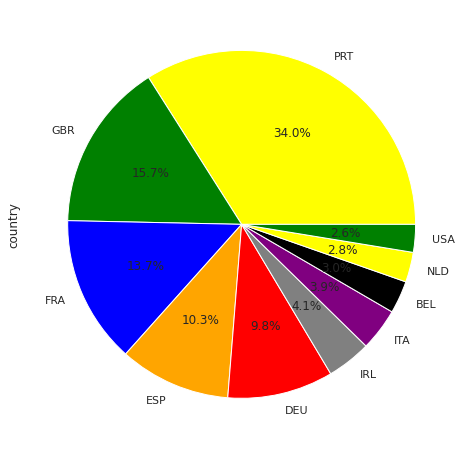

In [ ]:
# pie chart to see the distribution of guests across their country of origin
country.head(10).plot.pie(autopct='%1.1f%%',radius=1,colors=['yellow','green','blue','orange','red','grey','purple','black']);

The percentage is not accurate as a small portion of the pie chart consists of all the other countries where guests come from.

In [ ]:
country_names = ['Portugal','United Kingdom','France','Spain','Germany','Ireland','Italy','Belgium','Netherlands','USA']

Text(0.5, 1.0, 'Number of Bookings Across Countries of Origin')

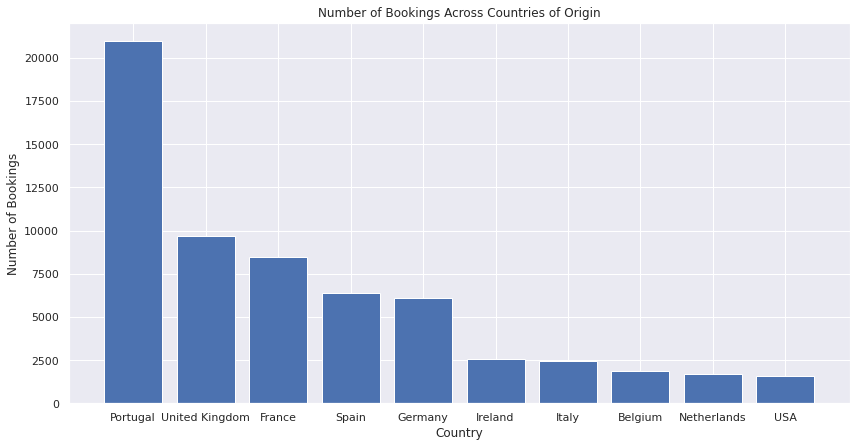

In [ ]:
plt.figure(figsize=(14,7))
plt.bar(country_names,country.head(10))
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings Across Countries of Origin')

We find that most of the guests come from European countries, the common country being Portugal (by a large margin) followed by UK and France.



## Which is the largest market segment and distribution channels?

We made a comparison of bookings by market segment between both hotels. The bookings are made into many 'market segments' based on the system/method through which the booking has been done. We will see later that this column shares similarities with 'distribution channel' column.

Text(0.5, 0, 'Hotels')

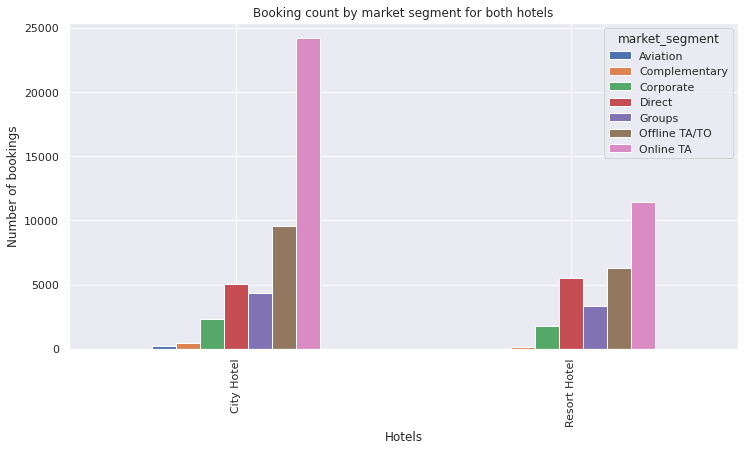

In [ ]:
# grouping by hotel and market segment
market_segment = hotel_checked_in_df.groupby(['hotel','market_segment']).size().unstack()
# filling missing values with zero (in case any of the categories are missing in any hotel)
market_segment.fillna(0, inplace=True)
# bar plot
market_segment.plot(kind='bar',figsize=(12,6))
plt.title("Booking count by market segment for both hotels")
plt.ylabel("Number of bookings")
plt.xlabel("Hotels")

We can see that the largest market segment is online TA (i.e most bookings come through online travel agencies), followed by offline TA/TO (TO refers to Tour Operators), in both hotels. The smallest segment is Aviation (with resort hotel having 0 or close to 0 bookings from Aviation).

Similar comparison can be done for distribution channel as well. It refers to the intermediary through which the service is provided to the customers. Hence, there are similarities between market segment and distribution channel in the information they provide.

Text(0.5, 0, 'Hotels')

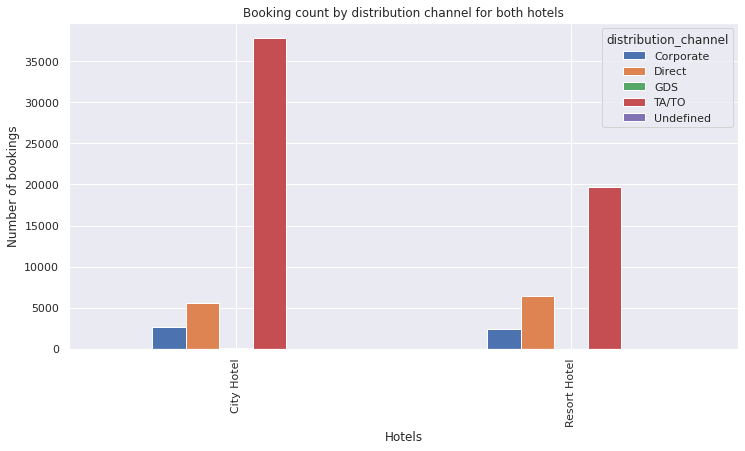

In [ ]:
# grouping the dataset by hotel and distribution channel
dist_channel = hotel_checked_in_df.groupby(['hotel','distribution_channel']).size().unstack()
# filling missing values
dist_channel.fillna(0, inplace=True)
# bar plot
dist_channel.plot(kind='bar',figsize=(12,6))
plt.title("Booking count by distribution channel for both hotels")
plt.ylabel("Number of bookings")
plt.xlabel("Hotels")

The most common distribution channel is TA/TO for both hotels, which implies that the booking was done through either travel agents or tour operators. Let us see if this matches with the information we got from the market segment column.

In [ ]:
# booking count by market segments
m_segment_ct = hotel_checked_in_df['market_segment'].value_counts()
m_segment_ct

Online TA        35599
Offline TA/TO    15854
Direct           10504
Groups            7692
Corporate         4121
Complementary      637
Aviation           183
Name: market_segment, dtype: int64

In [ ]:
# booking count by distribution channel
d_channel_ct = hotel_checked_in_df['distribution_channel'].value_counts()
d_channel_ct

TA/TO        57507
Direct       11908
Corporate     5018
GDS            156
Undefined        1
Name: distribution_channel, dtype: int64

Both columns contain categories which refer to the same thing. For example, Direct, Corporate, TA/TO (which can possibly be compared to the sum of Online TA and Offline TA/TO from market segment). However, there are slight discrepancies between the values.

In [ ]:
# TA/TO booking count from market segment
print('TA/TO from market segment: ', (m_segment_ct[0] + m_segment_ct[1]))
# TA/TO booking count from distribution channel
print('TA/TO from distribution channel: ',d_channel_ct[0], '\n')
# direct from market segment
print('Direct booking from market segment: ', m_segment_ct[2])
# direct from distribution channel
print('Direct booking from distribution channel: ', d_channel_ct[1], '\n')
# corporate from market segment
print('Corporate booking from market segment: ', m_segment_ct[4])
# corporate from distribution channel
print('Corporate booking from distribution channel: ', d_channel_ct[2])

TA/TO from market segment:  51453
TA/TO from distribution channel:  57507 

Direct booking from market segment:  10504
Direct booking from distribution channel:  11908 

Corporate booking from market segment:  4121
Corporate booking from distribution channel:  5018


The discrepancies could be a result of mistakes while recording the data or there could be some other factor affecting the categorisation that is unknown to us.

## How many nights do the guests stay?

To have a look at the distribution of total nights stayed, we need to create a new column as the dataset has separate columns for week nights and weekend nights.

In [ ]:
# new column total nights created
hotel_checked_in_df['stays_total_nights'] = hotel_checked_in_df['stays_in_week_nights'] + hotel_checked_in_df['stays_in_weekend_nights']

In [ ]:
# observing the total nights column
hotel_checked_in_df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,stays_total_nights
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0,7
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,151.20,0,2,Check-Out,2017-09-07,2.0,9


We can make a comparison beteen the two hotels by plotting the average total nights stayed.

In [ ]:
# average total nights by hotel type
hotel_checked_in_df.groupby(['hotel'])['stays_total_nights'].mean()

hotel
City Hotel      2.917864
Resort Hotel    4.165953
Name: stays_total_nights, dtype: float64

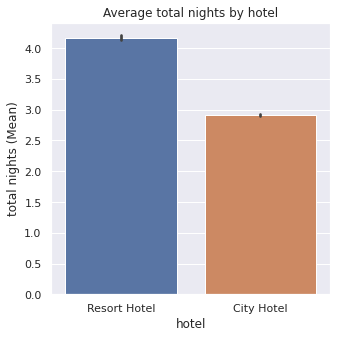

In [ ]:
# average of total night stayed by guests (by hotel type)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x="hotel",y="stays_total_nights",data= hotel_checked_in_df)
plt.title("Average total nights by hotel")
plt.ylabel("total nights (Mean)")
plt.show()

We can see that resort hotel has a slightly higher average of total nights stayed. But we can get a clearer picture by looking at the distribution of nights stayed, as there could be outliers affecting the mean. We will take the top 15 'total nights stayed' by booking count into consideration.

In [ ]:
total_nights_count = hotel_checked_in_df['stays_total_nights'].value_counts().head(15)
total_nights_count

3     15682
1     15523
2     15365
4     10996
7      5671
5      5098
6      2309
10      775
8       710
14      653
0       617
9       524
11      273
12      122
13       88
Name: stays_total_nights, dtype: int64

Text(0.5, 0, 'Total nights')

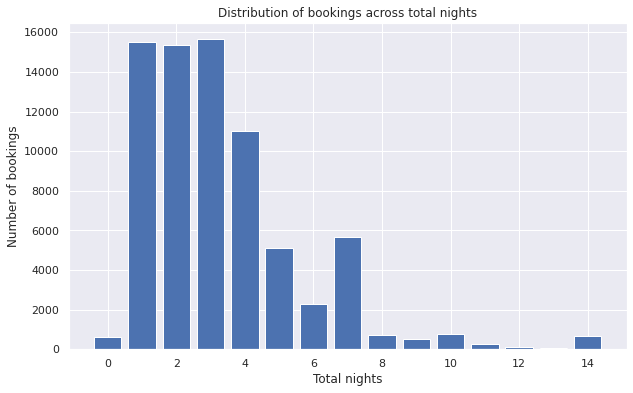

In [ ]:
# plotting distribution of bookings across the total nights stayed
plt.figure(figsize = (10,6))
plt.bar(total_nights_count.index,total_nights_count)
plt.title("Distribution of bookings across total nights")
plt.ylabel("Number of bookings")
plt.xlabel("Total nights")

Most number of bookings are with 3 total nights followed by 1 night and 2 nights. A simple count plot will allow us to visualise the same distribution comparison between the two hotels.

Text(0.5, 0, 'Total nights stayed')

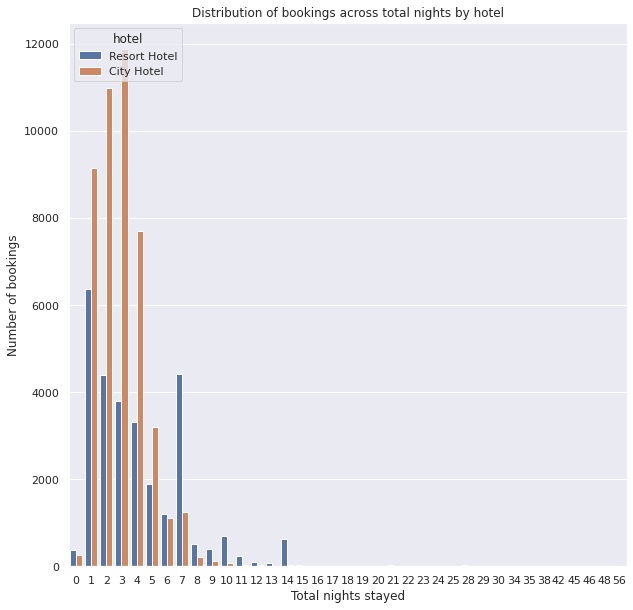

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
# number of bookings across total nights stayed (comparison by hotel type)
sns.countplot(data = hotel_checked_in_df, x = 'stays_total_nights', hue = 'hotel')
plt.title("Distribution of bookings across total nights by hotel")
plt.ylabel("Number of bookings")
plt.xlabel("Total nights stayed")

We can see the plot following the pattern of overall total nights stayed (city and resort hotel together). However, we can spot something interesting here. City hotel has a higher number of bookings for lower number of total nights (1-6), whereas for higher number (7-14), resort hotel has higher booking in comparison (eventhough the total booking count is small for higher number of days). Especially in case of 14 (even 12 and 13) total nights, resort hotel is the only one contributing. So, we could say resort hotel has a higher number of bookings where guests stayed many nights.

## How many booking changes did customers make?

Let us look at the booking changes column which refers to the number of booking changes made.

In [ ]:
# booking count by number of booking changes
hotel_checked_in_df['booking_changes'].value_counts().head()

0    59515
1    10806
2     3000
3      768
4      299
Name: booking_changes, dtype: int64

Pie chart gives us the percentage of bookings for each 'booking change' number.

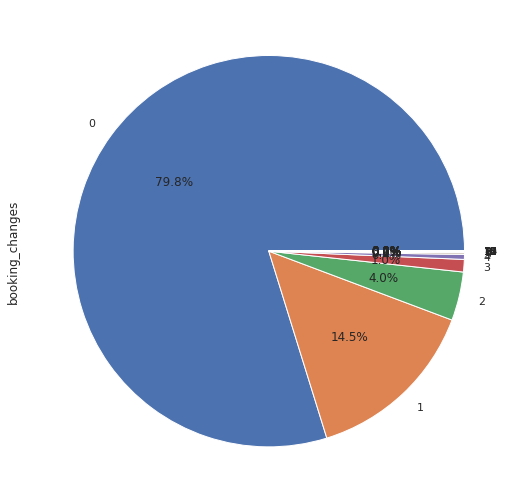

In [ ]:
plt.figure(figsize = (9,9))
hotel_checked_in_df['booking_changes'].value_counts().plot.pie(autopct='%1.1f%%',radius=1)

Most bookings (79.8%) did not have any changes made and it is followed by 1 and 2 changes.

## How many of the customers are repeated guests?

The percentage of repeated customers (those who have made a booking in the same hotel before) can be a potential indicator to the quality of the service. 

In [ ]:
# booking count by whether the customer is a repeated guest or not
hotel_checked_in_df['is_repeated_guest'].value_counts()

0    71389
1     3201
Name: is_repeated_guest, dtype: int64

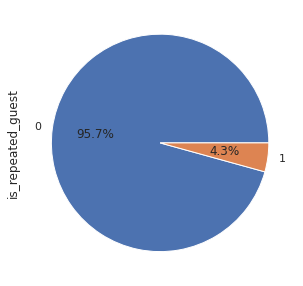

In [ ]:
# pie chart showing the percentage of repeated guests
plt.figure(figsize = (5,5))
hotel_checked_in_df['is_repeated_guest'].value_counts().plot.pie(autopct='%1.1f%%')

Out of the dataset, very few of the guests are repeated. There are a very few customers who are coming again. However this does not necessarily imply bad quality service. We know that there are a lot of guests coming from a variety of countries. Many of the guests could be foreign and thus are less likely to come again.

## Which hotel is more expensive?

Average Daily Rate is a measure of the average rental revenue for an occupied room per day. Let us look at the mean ADR of the two hotels

In [ ]:
# average adr for both hotels
hotel_checked_in_df.groupby(['hotel'])['adr'].mean()

hotel
City Hotel      106.036946
Resort Hotel     91.271430
Name: adr, dtype: float64

The city hotel has a higher average ADR than resort hotel.

An estimate of the total amount paid for each booking can be calculated by multiplying the ADR of that booking with the total nights stayed.

In [ ]:
# new column for total rate
hotel_checked_in_df['total_rate'] = hotel_checked_in_df['adr'] * hotel_checked_in_df['stays_total_nights']

In [ ]:
# the number of cases where the guests stayed 0 nights
hotel_checked_in_df[hotel_checked_in_df['stays_total_nights'] == 0].shape[0]

617

For the cases where the guests stayed zero nights the total amount estimate will come out to be zero. We will ignore this issue as the number of such cases is negligible and we don't have enough details to calculate the amount in such situations.

In [ ]:
# average total rate of both hotels
hotel_checked_in_df.groupby(['hotel'])['total_rate'].mean()

hotel
City Hotel      312.154681
Resort Hotel    403.918361
Name: total_rate, dtype: float64

The average total rate of resort hotel is higher than that of city hotel eventhough the average ADR was higher for city hotel. This is because many of the guests at resort hotel had longer stays in comparison to city hotel.

Text(0, 0.5, 'revenue')

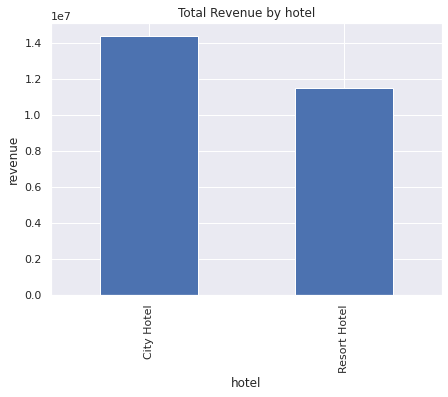

In [ ]:
plt.figure(figsize=(7,5))
# sum of total rates for both hotels
hotel_checked_in_df.groupby(['hotel'])['total_rate'].sum().plot(kind='bar')
plt.title("Total Revenue by hotel")
plt.ylabel("revenue")

The total revenue (sum of the total rates of all bookings across a hotel) is higher for the city hotel eventhough the average total rate is lower. This is understandable as the city hotel had a much higher number of bookings.

### Month-wise comparison of ADR and Total Rate for 2016

Since 2016 is the only year that we have complete information of, we can plot a month-wise graph of ADR and total rate for both hotels, for the year 2016.

Text(0.5, 0, 'Months')

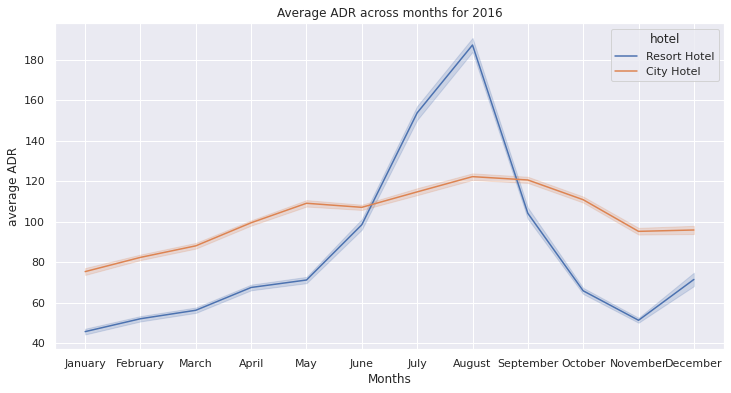

In [ ]:
plt.figure(figsize=(12,6))
# mean adr is calculated by default
# plotting mean adr across months
sns.lineplot(x = 'arrival_date_month', y = 'adr', hue = 'hotel', data = hotel_2016_df)
plt.title("Average ADR across months for 2016")
plt.ylabel("average ADR")
plt.xlabel("Months")

Resort hotel has ADR fluctuating across the months with July and August having very high ADR compared to the rest. City hotel has a fairly consistent ADR throughout the year 2016. Its not necessary that total rate follow the same trend as the total days can change the trend.

In [ ]:
# total nights column created for 2016 data frame
hotel_2016_df['stays_total_nights'] = hotel_2016_df['stays_in_week_nights'] + hotel_2016_df['stays_in_weekend_nights']

# total rate column constructed in data frame of 2016 bookings
hotel_2016_df['total_rate'] = hotel_2016_df['adr'] * hotel_2016_df['stays_total_nights']

Text(0.5, 0, 'months')

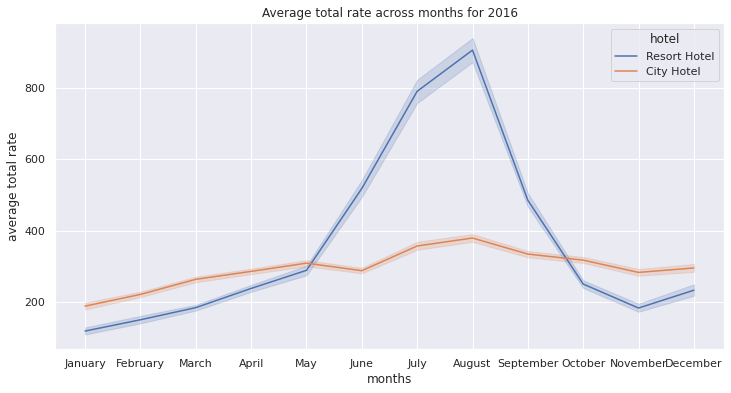

In [ ]:
plt.figure(figsize=(12,6))
# mean total rate is calculated by default
# plotting mean total rate across the months
sns.lineplot(x = 'arrival_date_month', y = 'total_rate', hue= 'hotel', data = hotel_2016_df)
plt.title("Average total rate across months for 2016")
plt.ylabel("average total rate")
plt.xlabel("months")

The total rate plot has a trend similar to that of ADR. The resort hotel is very expensive from June to September (especially July and August) compared to the rest of the months. City hotel remains relatively consistent throughout. For both hotels bookings were cheapest during January.

## Summary

We were able to ask some good questions and gain some really important information that could help take steps to improve the experience for customers as well as benefit the hotel businesses.

**Which hotel has the most bookings?**

The city hotel has 66.7% of the total bookings. The resort hotel is less commonly booked as it probably would be catered towards special events, vacations etc.

**How many bookings were cancelled?**

37.2% of the bookings were cancelled. Some factors contributing to the high number could be not having to deposit an amount while booking, high waiting time for the booking to get confirmed and high lead time (between booking and checking in). Making deposit mandatory could reduce cancellations but could also push away some customers. Reducing waiting list time can definitely improve customer experience.

**Which is the busiest month across the year 2016?**

Month-wise analysis comparing three years showed that the dataset did not have complete information about all the months across three years. October was the busiest month in 2016 (by small margin) and January was the least busy. However, general information the demands across the months cannot be obtained from the data.

**Which is the most sought after room type?**

Type A is the most sought after one and it is the only room type for which the demand is not being met. Increasing the availability of type A can improve the customer experience.

**From which countries do most guests arrive?**

A large percentage of the guests are from Portugal followed by UK and France. Catering to the specific needs of those people (for example, availabilty of their local cuisine) can improve the customer experience and the popularity of the hotels.

**Which is the largest market segment and distribution channels?**

Travel agencies and tour operators are the most common intermediaries. And among them, online travel agencies are more popular. Prioritising and improving online presence will increase the reach of the hotels. The best way for customers to connect to these hotels is through online TA.

**How many nights do the guests stay?**

1-3 nights is the most common length of stay. Hotels can make arrangements accordingly. Longer stay is more common in Resort hotel.

**How many booking changes did customers make?**

Most customers make less or no changes in their booking.

**How many of the customers are repeated guests?**

Very few (4.3%) of the customers are repeated guests. Steps can be taken to improve the connection with the customers in order to motivate them to use the services again (for example, discounts for repeated customers)

**Which hotel is more expensive?**

The city hotel has a higher ADR (more expensive). The city hotel earns a higher revenue than the resort hotel as it is much more actively booked. Across months in 2016, July and August has a very high rate, in case of resort hotel. But prices of city hotel remain fairly consistent.